In [5]:
# Objectives
## Obj:  Learn and apply essential Data Science libraries used for data exploration, processing and transformation for further analysis

### Pandas Visualization
[Reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

SyntaxError: invalid syntax (1800008153.py, line 5)

In [6]:
# loading dataframe
import pandas as pd
df = pd.read_csv('cv_cases.csv', encoding='unicode_escape')
df.head()

,Age,SexID,CivilStatusID,Nationality,SpecialPopulationID,HealthCareWorkerYN,AdmittingFacilityID,CurrentHealthStatus,OutcomeID,CauseOfDeath,...,ID_2,NAME_2,ID_3,NAME_3,PROVINCE,REGION,month,year,year_month,year_week
0,30,Male,NaN,Filipino,LOCAL,No,REGION II TRAUMA AND MEDICAL CENTER,Asymptomatic,Recovered,None,...,1164,Solano,30400,Roxas,Nueva Vizcaya,Cagayan Valley (Region II),3,2020,2020-M03,2020-W12
1,29,Female,Single,Filipino,LOCAL,Yes,CAGAYAN VALLEY MEDICAL CENTER,Mild,Recovered,None,...,696,Cabagan,17489,Casibarag Sur,Isabela,Cagayan Valley (Region II),3,2020,2020-M03,2020-W12
2,26,Female,Single,Filipino,Locally Stranded Individual (LSI),No,CAGAYAN VALLEY MEDICAL CENTER,Asymptomatic,Recovered,None,...,315,Enrile,7269,Barangay III,Cagayan,Cagayan Valley (Region II),6,2020,2020-M06,2020-W25
3,24,Female,Single,Filipino,Returning Overseas Filipino (ROF),No,SOUTHERN ISABELA MEDICAL CENTER,Asymptomatic,Recovered,None,...,698,Cauayan City,17557,District III,Isabela,Cagayan Valley (Region II),6,2020,2020-M06,2020-W26
4,22,Male,NaN,Filipino,Locally Stranded Individual (LSI),No,CAGAYAN VALLEY MEDICAL CENTER,Asymptomatic,Recovered,None,...,696,Cabagan,17489,Casibarag Sur,Isabela,Cagayan Valley (Region II),6,2020,2020-M06,2020-W26


<AxesSubplot:xlabel='SexID'>

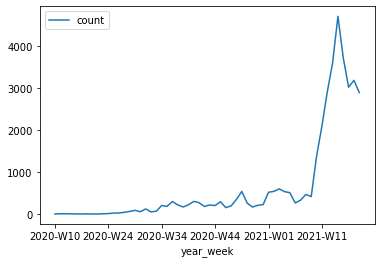

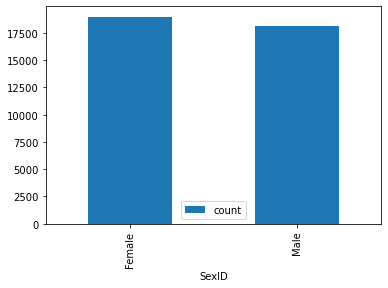

In [7]:
# line plot
line_df = df.groupby('year_week').size().reset_index()
line_df.rename(columns={0:'count'}, inplace=True)
line_df.plot('year_week', 'count', kind='line')

# bar chart
# grouping
bar_df = df.groupby('SexID').size().reset_index()
bar_df.rename(columns={0:'count'}, inplace=True)
bar_df.plot('SexID', 'count', kind='bar')

## Obj: Acquire fundamental knowledge and common operations for Geospatial Analysis


### What is geographical / spatial analysis and why should we care?
* Placing things in geographic context brings those things into immediate perspective. 

<img src="http://www.esri.com/about/newsroom/wp-content/uploads/files/2014/10/1a-1024x575.jpg" width="250"/>

* “Everything is related to everything else, but near things are more related than distant things.”

<img src="http://www.esri.com/about/newsroom/wp-content/uploads/files/2014/10/2a-1024x575.jpg" width="250"/>

*  Finding out what’s nearby can help bring context to dynamic situations and deepen your understanding of a location. In many cases, things are connected to other things.

<img src="http://www.esri.com/about/newsroom/wp-content/uploads/files/2014/10/3a-1024x576.jpg" width="250"/>

* Understanding how and where all those things are connected will help you better manage, monitor and maintain the system.

<img src="http://www.esri.com/about/newsroom/wp-content/uploads/files/2014/10/4a-1024x576.jpg" width="250"/>

* Different Sources put together provide information

<img src="./media/gis.png" width="250"/>

<img src="./media/gis2.png" width="500"/>

### Data Types
* Vector Data
    * Point: a pair of x and y coordinates
    * Line: a series of points connected together
    * Polygon: a line enclosed from end to end
    
    <img src="./media/vector_data.png" width=500>
    <img src="./media/vector_coordinates.png" width=500>
    
* Raster Data
    * pixel, value
    * example: the values might be:
        * 1 = water (colored blue)
        * 2 = forest (dark green)
        * 3 = desert (dark brown)
        * etc…
    <img src="./media/raster_data.png" width=250>

### GIS Terms

* Geocoding
  * Process of assigning alphanumeric locational identifiers (such as the municipal address or physical location) to spatially related information. For example, an address may be matched to an address range on a street segment, or a given spatial area
* Euclidean Distance
  * The shortest distance joining two points in the plane
* Label
  *A vector element that contains text used to identify a node, line, or polygon element
* Layer 
  * Refers to the various overlays of data, each of which normally deals with one thematic topic. These overlays are registered to each other by the common coordinate system of the database.
* Legends
  * The part of the drawn map explaining the meaning of the symbols used to code the depicted geographical elements
* Map scale 
  * The relationship that exists between a distance on a map and the corresponding distance on the Earth. It may be expressed as an equivalence, one inch equals 16 statute miles; as a fraction or ratio, 1:1,000,000; or as a bar graph subdivided to show the distance that each of its parts represents on the Earth.
* Network analysis
  * Analytical techniques concerned with the relationships between locations on a network, such as the calculation of optimal routes through road networks, capacities of network systems, best location for facilities along networks, etc.
* Coordinate Systems 
  * A particular kind of reference frame or system, such as plane rectangular coordinates or spherical coordinates, which use linear or angular quantities to designate the position of points within that particular reference frame or system.

**Types of Coordinate Systems**
* Polar / Geographic coordinate System: Degrees, Minutes, Seconds
* Rectangular / Planar coordinate System: longitude, latitude, altitude

### Project Coordinate System

<img src="http://i.stack.imgur.com/7zI6N.jpg" width=500>

### Common File Types

* .kml - keyhole markup language (google maps / earth)
* .shp - shapefile
* .geojson
* .bmp - for raster files

### Common Spatial Visualizations

* Scatter Plot -> Point Data and Line Data
    * A scatter plot (aka scatter chart, scatter graph) uses dots to represent values based on coordinates
    * based on basic scatter plot
* Choropleth Map -> Polygon Data
    * Choropleth maps are thematic maps that use different shading patterns and sequential color schemes for geographical areas, based on the statistical data within them. 
    * Derived from basic heatmap

## Obj: Learn and apply Python Libraries for Geospatial Analysis

In [8]:
import geopandas as gpd
# Importing File
bdy_gdf = gpd.read_file('municity_boundaries.geojson')
bdy_gdf

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,geometry
0,0.337859,0.002899,Basco,PH020901000,None,Capital,None,Batanes,PH020900000,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.98390 20.42140, 121.98351 ..."
1,0.982948,0.007748,Itbayat,PH020902000,None,None,None,Batanes,PH020900000,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.93822 20.69659, 121.93820 ..."
2,0.192480,0.001272,Ivana,PH020903000,None,None,None,Batanes,PH020900000,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.93755 20.41184, 121.94070 ..."
3,0.218340,0.001000,Mahatao,PH020904000,None,None,None,Batanes,PH020900000,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.97060 20.41905, 121.97027 ..."
4,0.498514,0.003545,Sabtang,PH020905000,None,None,None,Batanes,PH020900000,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.80941 20.33665, 121.80995 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.722393,0.015999,Cabarroguis,PH025702000,None,Capital,None,Quirino,PH025700000,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.55018 16.53115, 121.55010 ..."
89,0.805359,0.024370,Diffun,PH025703000,None,None,None,Quirino,PH025700000,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.57589 16.59786, 121.56753 ..."
90,1.452322,0.065177,Maddela,PH025704000,None,None,None,Quirino,PH025700000,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.81960 16.22623, 121.78944 ..."
91,0.323976,0.004247,Saguday,PH025705000,None,None,None,Quirino,PH025700000,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.57589 16.59786, 121.57604 ..."


<AxesSubplot:>

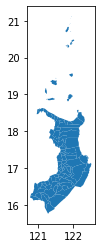

In [9]:
# visualizing map
bdy_gdf.plot()

<AxesSubplot:>

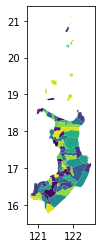

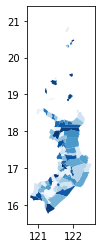

In [10]:
# creating choropleth map / heatmap
import numpy as np

# Setting our plot

# Setting a seed allows you to get the same "random" numbers that we do
# This is really nice for testing, so you can compare results
np.random.seed(101)

# randint(LB, UB, num_elements)
series = np.random.randint(0,100,len(bdy_gdf))
bdy_gdf['random_count'] = series

# plot
bdy_gdf.plot('random_count')

# changing color scale. reference: https://matplotlib.org/stable/tutorials/colors/colormaps.html
bdy_gdf.plot('random_count', cmap='Blues') #colormap

<AxesSubplot:>

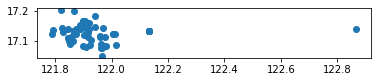

In [11]:
# converting dataframes with coordinates to geodataframes
evac_df = pd.read_csv('./evacuation_sites.csv')

evac_df = evac_df.loc[evac_df['latitude']>0] #trimming latitude out of bound / dataset error

## Note, we need to specify the crs = Coordinate Reference System -> dictates projection type. Normally used: epsg:4326
evac_gdf = gpd.GeoDataFrame(evac_df, geometry=gpd.points_from_xy(evac_df.longitude, evac_df.latitude), crs='epsg:4326')
evac_gdf.plot()

<AxesSubplot:>

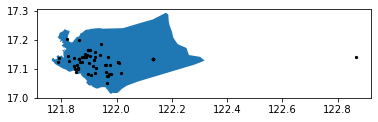

In [12]:
# overlaying geodataframe layers
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#bdy_gdf.boundary.plot(ax=ax)

# since evacuation site dataset is only available for ilagan
# we try to trim the geodataframe to scope only ilagan
ilagan_gdf = bdy_gdf[bdy_gdf['ADM3_EN'].str.contains('Ilagan')]

# 1st plot
ilagan_gdf.plot(ax=ax)

# 2nd plot
evac_gdf.plot(ax=ax, color='black', markersize=5)

<AxesSubplot:>

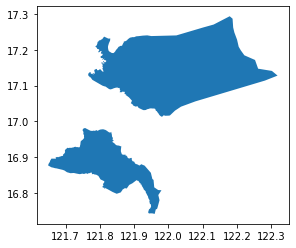

In [13]:
bdy_gdf[(bdy_gdf['ADM3_EN'].str.contains('Cauayan')) | (bdy_gdf['ADM3_EN'].str.contains('Ilagan'))].plot()

### Basic Spatial Operations

<img src="https://geopandas.org/_images/overlay_operations.png">

In [14]:
df = pd.DataFrame({'a' : [1,2], 'b': [3,4]}) 
df
# a | b
# 1 | 3
# 2 | 4


,a,b
0,1,3
1,2,4


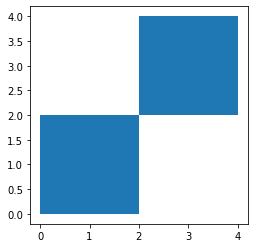

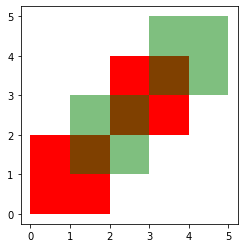

In [15]:
from shapely.geometry import Polygon
# preparing shapes

polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]), 
                        Polygon([(2,2), (4,2), (4,4), (2,4)])])


polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]), 
                        Polygon([(3,3), (5,3), (5,5), (3,5)])])


gdf1 = gpd.GeoDataFrame({'geometry': polys1})
gdf2 = gpd.GeoDataFrame({'geometry': polys2})

gdf1.plot()

ax = gdf1.plot(color='red');
gdf2.plot(ax=ax, color='green', alpha=0.5);

<AxesSubplot:>

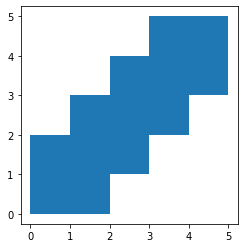

In [16]:
# spatial operations
res_union = gpd.overlay(gdf1, gdf2, how='union')
res_union.plot()

<AxesSubplot:>

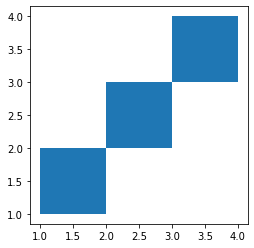

In [17]:
res_intersection = gpd.overlay(gdf1, gdf2, how='intersection')
res_intersection.plot()

<AxesSubplot:>

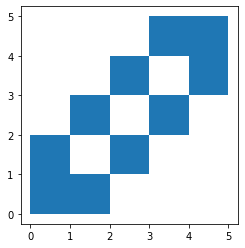

In [18]:
res_symdiff = gpd.overlay(gdf1, gdf2, how='symmetric_difference')
res_symdiff.plot()

<AxesSubplot:>

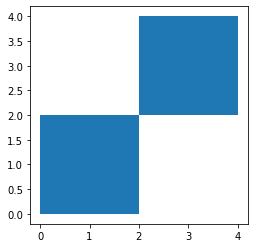

In [19]:
res_identity = gpd.overlay(gdf1, gdf2, how='identity')
res_identity.plot()

### Joins

**Attribute Join**

Attribute joins are accomplished using the merge method. In general, it is recommended to use the merge method called from the spatial dataset. With that said, the stand-alone merge function will work if the GeoDataFrame is in the left argument; if a DataFrame is in the left argument and a GeoDataFrame is in the right position, the result will no longer be a GeoDataFrame.

**Spatial Join**
Two geometry objects are merged based on their spatial relationship to one another.

(Useful for non-type data types like polygon and point, polygon and line, etc)

*In geopandas*
sjoin() has two core arguments: how and op.

op

    * intersects
    * contains
    * within
    * touches
    * crosses
    * overlaps

how

    * left: retain only the left_df geometry column
    * right: retain only the right_df geometry column
    * inner: use intersection of index values from both geodataframes; retain only the left_df geometry column

type of gdf variable
<class 'geopandas.geodataframe.GeoDataFrame'>
columns of gdf
Index(['name', 'pop_est', 'geometry'], dtype='object')
type of df variable
<class 'pandas.core.frame.DataFrame'>
columns of df
Index(['name', 'continent'], dtype='object')
        name      continent
0       Fiji        Oceania
1   Tanzania         Africa
2  W. Sahara         Africa
3     Canada  North America
Index(['name', 'pop_est', 'geometry', 'continent'], dtype='object')
Index(['name', 'continent', 'pop_est', 'geometry'], dtype='object')


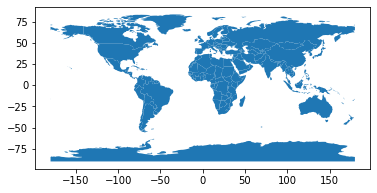

In [20]:
# Attribute join
import geopandas as gpd
import pandas as pd
# setup
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #gdf

gdf = world[['name', 'pop_est', 'geometry']]
df = pd.DataFrame(world[['name', 'continent']])

print("type of gdf variable")
print(type(gdf))

print("columns of gdf")
print(gdf.columns)

print("type of df variable")
print(type(df))

print("columns of df")
print(df.columns)
print(df.head(4))

# actual analysis / application
# left = geodataframe, right=dataframe
merged_gdf = gdf.merge(df, on='name')

# merged_gdf is still plottable
merged_gdf.plot()

type(merged_gdf)

###
gdf_over_df = gdf.merge(df, on='name')
df_over_gdf = df.merge(gdf, on='name')

print(gdf_over_df.columns)
print(df_over_gdf.columns)

In [36]:
# Spatial Join

# evac_gdf does not have information regarding which what city are these building located
print(evac_gdf.columns)
print(bdy_gdf.columns)

# how can we see in which cities they fall under like how they are bounded in flat maps?
sjoin_gdf = gpd.sjoin(evac_gdf, bdy_gdf, op='intersects', how='left')
print(sjoin_gdf.columns)

Index(['id', 'name', 'latitude', 'longitude', 'no_of_family',
       'no_of_individuals', 'no_storey_floors', 'no_of_rooms',
       'no_of_toilet_for_women', 'no_of_toilet_for_men', 'common_cr',
       'no_of_bath_shower_area_for_women', 'no_of_bath_shower_area_for_men',
       'water_sources', 'breastfeeding_area', 'with_storage', 'floor_area',
       'used_as_covid19_ttmf', 'inspected_safe', 'geometry'],
      dtype='object')
Index(['Shape_Leng', 'Shape_Area', 'ADM3_EN', 'ADM3_PCODE', 'ADM3_REF',
       'ADM3ALT1EN', 'ADM3ALT2EN', 'ADM2_EN', 'ADM2_PCODE', 'ADM1_EN',
       'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn', 'geometry',
       'random_count'],
      dtype='object')
Index(['id', 'name', 'latitude', 'longitude', 'no_of_family',
       'no_of_individuals', 'no_storey_floors', 'no_of_rooms',
       'no_of_toilet_for_women', 'no_of_toilet_for_men', 'common_cr',
       'no_of_bath_shower_area_for_women', 'no_of_bath_shower_area_for_men',
       'water_sources', 'breas

In [38]:
sjoin_gdf.groupby('ADM3_EN').size()

ADM3_EN
Gamu            1
Ilagan City    67
dtype: int64

<AxesSubplot:>

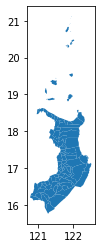

In [32]:
bdy_gdf.head(5)
bdy_gdf.plot()

<AxesSubplot:>

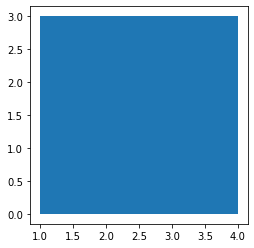

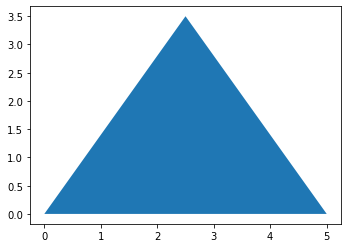

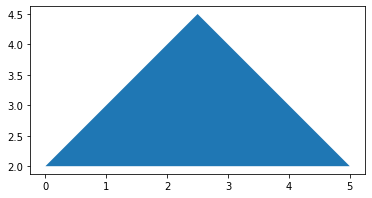

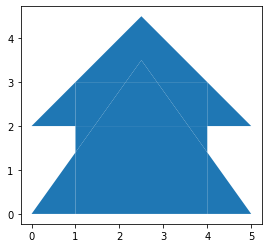

In [42]:
import geopandas as gpd
from shapely.geometry import Polygon

square = [(1,0), (4, 0), (4, 3), (1,3), (1,0)]
triangle_low = [(0,0), (5, 0), (5/2, 3.5), (0,0)]
triangle_up = [(0, 2), (5, 2), (2.5, 4.5), (0, 2)]

# initialized geodataframe
sq_gdf = gpd.GeoDataFrame({'a':[0], 'geometry':Polygon(square)})
low_gdf = gpd.GeoDataFrame({'a':[0], 'geometry':Polygon(triangle_low)})
up_gdf = gpd.GeoDataFrame({'a':[0], 'geometry':Polygon(triangle_up)})

sq_gdf.plot()
low_gdf.plot()
up_gdf.plot()

res_union1 = gpd.overlay(sq_gdf, low_gdf, how='union')
res_union2 = gpd.overlay(res_union1, up_gdf, how='union')

<AxesSubplot:>

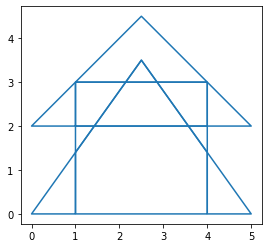

In [45]:
# another view of the hint

res_union2.boundary.plot() #boundary.plot will force to only show boundary and remove shape fills

# Exercises


**Spatial Operations**

Copy the code block below and run it:

```python
import geopandas as gpd
from shapely.geometry import Polygon

square = [(1,0), (4, 0), (4, 3), (1,3), (1,0)]
triangle_low = [(0,0), (5, 0), (5/2, 3.5), (0,0)]
triangle_up = [(0, 2), (5, 2), (2.5, 4.5), (0, 2)]

# initialized geodataframe
sq_gdf = gpd.GeoDataFrame({'a':[0], 'geometry':Polygon(square)})
low_gdf = gpd.GeoDataFrame({'a':[0], 'geometry':Polygon(triangle_low)})
up_gdf = gpd.GeoDataFrame({'a':[0], 'geometry':Polygon(tria_up)})
```

Using the geodataframes initialized in the code block, use the basic spatial operations to create the following shapes:

* House
    
![](./media/house.png)

* Hexagon

![](./media/trapezoid.png)

* Hut
![](./media/hut.png)

**Choropleth**

* Given `province_boundaries.geojson` and `cv_cases.csv`)
* Display the choropleth map for the accumulated cases per province

![](./media/choropleth.png)



In [46]:
# import the dataset
# geojson -> geodataframe
gdf = gpd.read_file('province_boundaries.geojson')

# csv -> dataframe
df = pd.read_csv('cv_cases.csv')

In [66]:
gdf.head(5) # ADM2_EN
print(gdf['ADM2_EN'].unique())
gdf.head(5)

['Batanes' 'Cagayan' 'Isabela' 'Nueva Vizcaya' 'Quirino']


,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,geometry
0,2.140564,0.017443,Batanes,PH020900000,None,None,None,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.80941 20.33665, 121.80995 ..."
1,10.518335,0.750946,Cagayan,PH021500000,None,None,None,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((122.32754 18.24594, 122.32689 ..."
2,5.588934,0.890507,Isabela,PH023100000,None,None,None,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((122.46667 16.92135, 122.46735 ..."
3,3.712481,0.348874,Nueva Vizcaya,PH025000000,None,None,None,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((121.44575 16.63430, 121.43647 ..."
4,2.976781,0.234041,Quirino,PH025700000,None,None,None,Region II,PH020000000,Philippines (the),PH,2016-06-15,2018-01-30,"MULTIPOLYGON (((122.05881 16.50925, 122.05222 ..."


In [54]:
df.head(5) #PROVINCE
print(df['PROVINCE'].unique())

['Nueva Vizcaya' 'Isabela' 'Cagayan' 'Batanes' 'Quirino']


In [79]:
accumulated_cases_df = df.groupby(['PROVINCE']).size().reset_index()
accumulated_cases_df.rename(columns={0:'cases_count'}, inplace=True)

In [80]:
merged_gdf = gdf.merge(accumulated_cases_df, left_on='ADM2_EN', right_on='PROVINCE')

,geometry,cases_count,PROVINCE
0,"MULTIPOLYGON (((121.80941 20.33665, 121.80995 ...",15,Batanes
1,"MULTIPOLYGON (((122.32754 18.24594, 122.32689 ...",10361,Cagayan
2,"MULTIPOLYGON (((122.46667 16.92135, 122.46735 ...",20750,Isabela
3,"MULTIPOLYGON (((121.44575 16.63430, 121.43647 ...",3819,Nueva Vizcaya
4,"MULTIPOLYGON (((122.05881 16.50925, 122.05222 ...",2131,Quirino


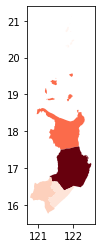

In [81]:
map_gdf = merged_gdf[['geometry', 'cases_count', 'PROVINCE']]
map_gdf.plot('cases_count', cmap='Reds')
map_gdf

# evaluating the dataframes
# finding common values / identifying "pk", "fk"
# aggregating dataframe by province and counting the number of cases per province
# merged the geodataframe and dataframe
# visualization # geodataframe -> map presentation; dataframe -> value for the choropleth map

# Recap

## Objectives

* Install, setup, and run python applications
* Learn and apply basic and advanced programming skills in core python
* Learn and apply essential Data Science libraries used for data exploration, processing and transformation for further analysis
* Acquire fundamental knowledge and common operations for Geospatial Analysis
* Learn and apply Python Libraries for Geospatial Analysis